In [ ]:
#If opening in colab run this cell
!git clone https://github.com/CTVisMe/DS4B_Sp24.git
%cd DS4B_Sp24/ClassModules/Module6_Similarity/

Cloning into 'DS4B_Sp24'...
remote: Enumerating objects: 933, done.
remote: Counting objects: 100% (335/335), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 933 (delta 172), reused 327 (delta 166), pack-reused 598
Receiving objects: 100% (933/933), 164.78 MiB | 13.27 MiB/s, done.
Resolving deltas: 100% (435/435), done.
Updating files: 100% (162/162), done.
/content/DS4B_Sp24/ClassModules/Module6_Similarity/DS4B_Sp24/ClassModules/Module6_Similarity


### Importing Class Similarities Data

First we will import some modules that we might need 😉

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier


##Part 1: Exploring the Data

Now lets read in the data from the ClassSimilarities.csv matrix.

These are the results from the [Class Similarities Survey](https://forms.gle/qmt3UdKwTVcU4vkHA) for my three Data Science classes in Spring 2024.

In [ ]:
# read in data
sims = pd.read_csv('data/ClassSimilarities.csv')

sims.tail(23)


,Timestamp,Section,NYUID,Name,Broccoli,Taylor Swift,Metallica,Kendrick Lamar,Game of Thrones,Baseball,...,Peanut Butter,Napoleon Dynamite (movie),Barbie (movie),Pro Wrestling,Video Games,Cilantro,Broadway Musicals,Scary Roller Coasters,Art Museums,Coffee
99,2024/03/27 7:51:52 PM AST,Section 30,eh1658,Erwin,3,3,4,5,4,4,...,5,5,3,3,5,5,2,5,2,10
100,2024/03/27 7:51:54 PM AST,Section 30,sbs8673,Sunny Shah,3,3,3,2,2,2,...,4,1,1,3,3,3,2,3,3,2
101,2024/03/27 7:51:55 PM AST,Section 30,rcm8445,Rohith,1,4,3,3,5,2,...,4,3,1,2,5,5,4,5,2,2
102,2024/03/27 7:52:00 PM AST,Section 30,as17339,Aditya Suresh,1,3,5,4,3,2,...,1,3,1,3,5,3,1,5,2,0
103,2024/03/27 7:52:04 PM AST,Section 30,ss16915,Siddharth Singh,3,1,3,5,5,3,...,4,3,3,3,5,4,3,5,5,7
104,2024/03/27 7:52:06 PM AST,Section 30,sp7940,Sanam Palsule,4,4,3,2,3,3,...,2,3,4,1,4,4,4,5,2,18
105,2024/03/27 7:52:08 PM AST,Section 30,kk5054,Keya Keya,1,5,1,3,4,3,...,2,1,4,1,5,4,5,5,5,3
106,2024/03/27 7:52:13 PM AST,Section 30,cw4526,Chung-Lin Wu,3,3,4,3,3,3,...,4,3,3,3,5,4,3,4,2,0
107,2024/03/27 7:52:14 PM AST,Section 30,sj4391,Shraddha,5,5,4,2,4,1,...,1,5,2,1,4,5,4,5,5,1
108,2024/03/27 7:52:18 PM AST,Section 30,tav247,Thomas Vetere,4,1,4,2,2,3,...,1,4,1,3,4,2,2,5,4,14


Take the data and filter out only for your class **(e.g. 'Section 1')**

Call your matrix "class_df"


In [ ]:
class_df = sims[sims['Section'] == 'Section 30']


sims['Section'].value_counts()

Section
Section 1     45
Section 30    40
Section 2     37
Name: count, dtype: int64

Explore the features of interest.  
Sort by the mean to see which ones are most (and least) popular.  Maybe even sort hightest to lowest!

Plot barplots to visualize the distributions of each of the features.

Suggestion - define the columns of interest as `feature_cols` and use a for loop to iterate over all of the features of interest and plot a barplot.

Try and get the barplot to plot in order from 1 to 5 on the x-axis. (can use "reindex" for this)

In [ ]:
feature_cols=class_df.columns[4:28]


plt.figure(figsize=(15, 10))

mean_scores = class_df[feature_cols].mean().sort_values(ascending=False)
mean_scores.round(2)




Scary Roller Coasters            4.32
Cilantro                         4.10
Video Games                      3.98
Computer Programming / Coding    3.98
Sushi                            3.72
Broadway Musicals                3.62
Game of Thrones                  3.58
Reading Novels                   3.52
Broccoli                         3.45
Art Museums                      3.42
Jazz Music                       3.40
Alcohol                          3.40
Jogging                          3.22
Taylor Swift                     3.18
Peanut Butter                    3.12
Winter                           3.12
Kendrick Lamar                   3.12
Metallica                        3.12
Napoleon Dynamite (movie)        2.70
Golf                             2.65
Barbie (movie)                   2.62
Pro Wrestling                    2.55
Baseball                         2.22
Cannabis                         2.15
dtype: float64

<Figure size 1500x1000 with 0 Axes>

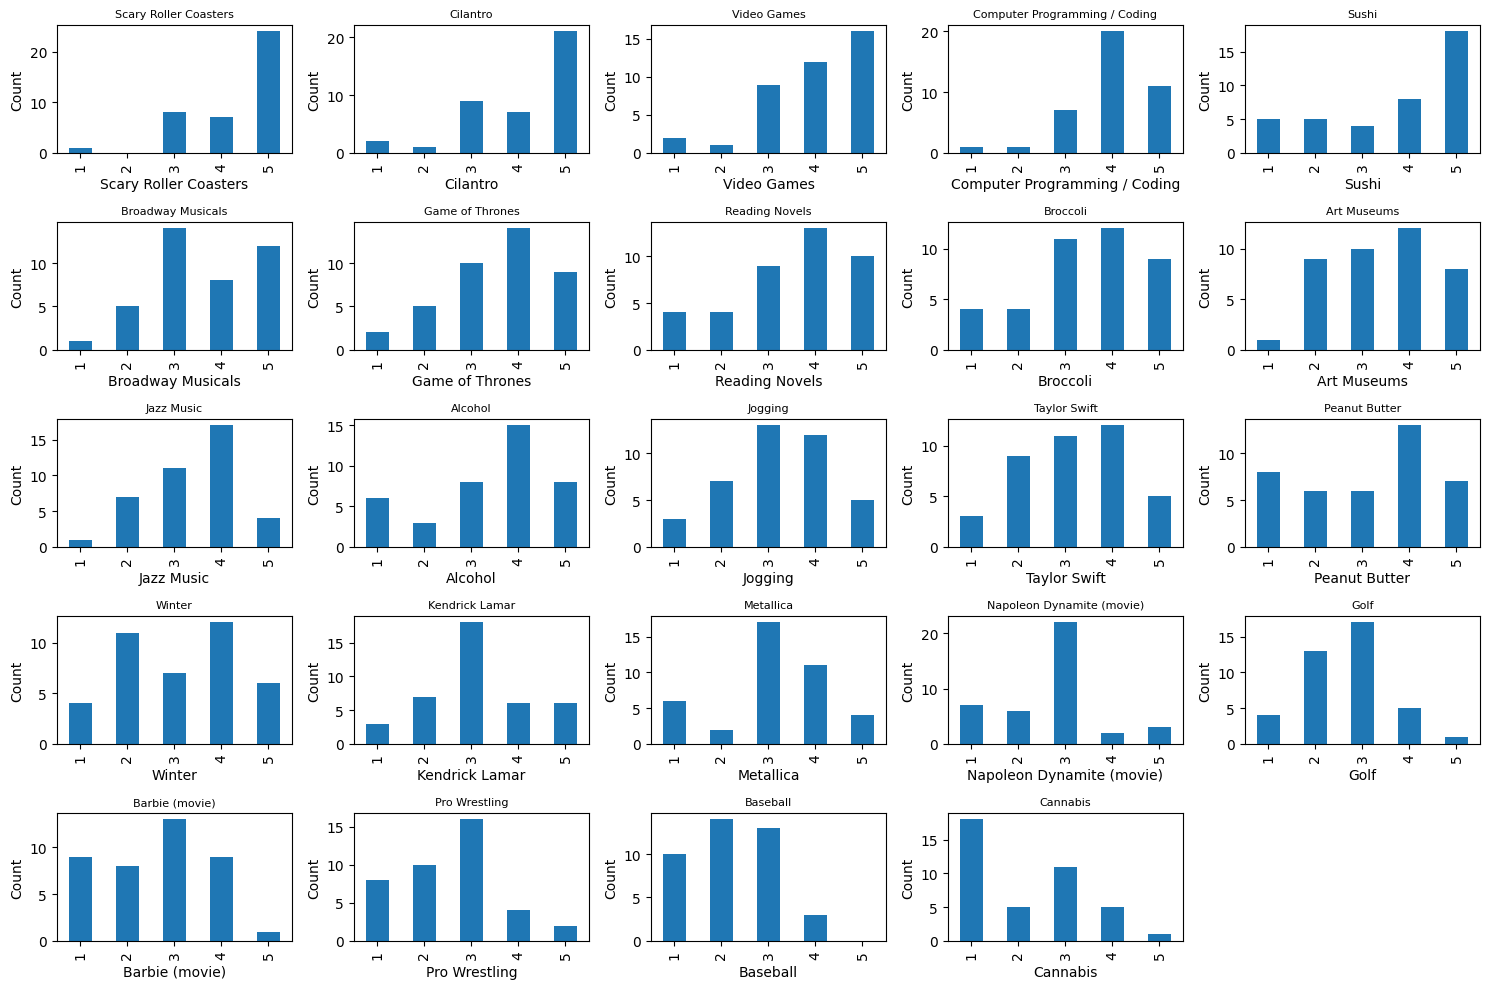

In [ ]:

sorted_features = mean_scores.sort_values(ascending=False).index

plt.figure(figsize=(15, 10))
# Iterate over each feature
for i, feature in enumerate(sorted_features):
    # Create a subplot for each feature
    ax = plt.subplot(5, 5, i+1)

    # Reindex the value counts to include all values 1 through 5
    counts = class_df[feature].value_counts().reindex(range(1, 6), fill_value=0)

    # Plot the bar chart
    counts.plot(kind='bar', ax=ax)

    # Set the x-axis range
    plt.xticks(range(0, 5))

    # Set the title and labels
    ax.set_title(feature, fontsize=8)
    ax.set_ylabel('Count')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


Plot a heatmap of the correlations to see which features are most positively and negatively correlated.  Use the `.corr()` function in seaborn and `sns.heatmap`.  Any interesting results here?


*you can play with colorbrewer colors here!  My favorite is cmap='RdBu_r' and dont forget to set the limits to (-1,1) using `vmax` and `vmin`*

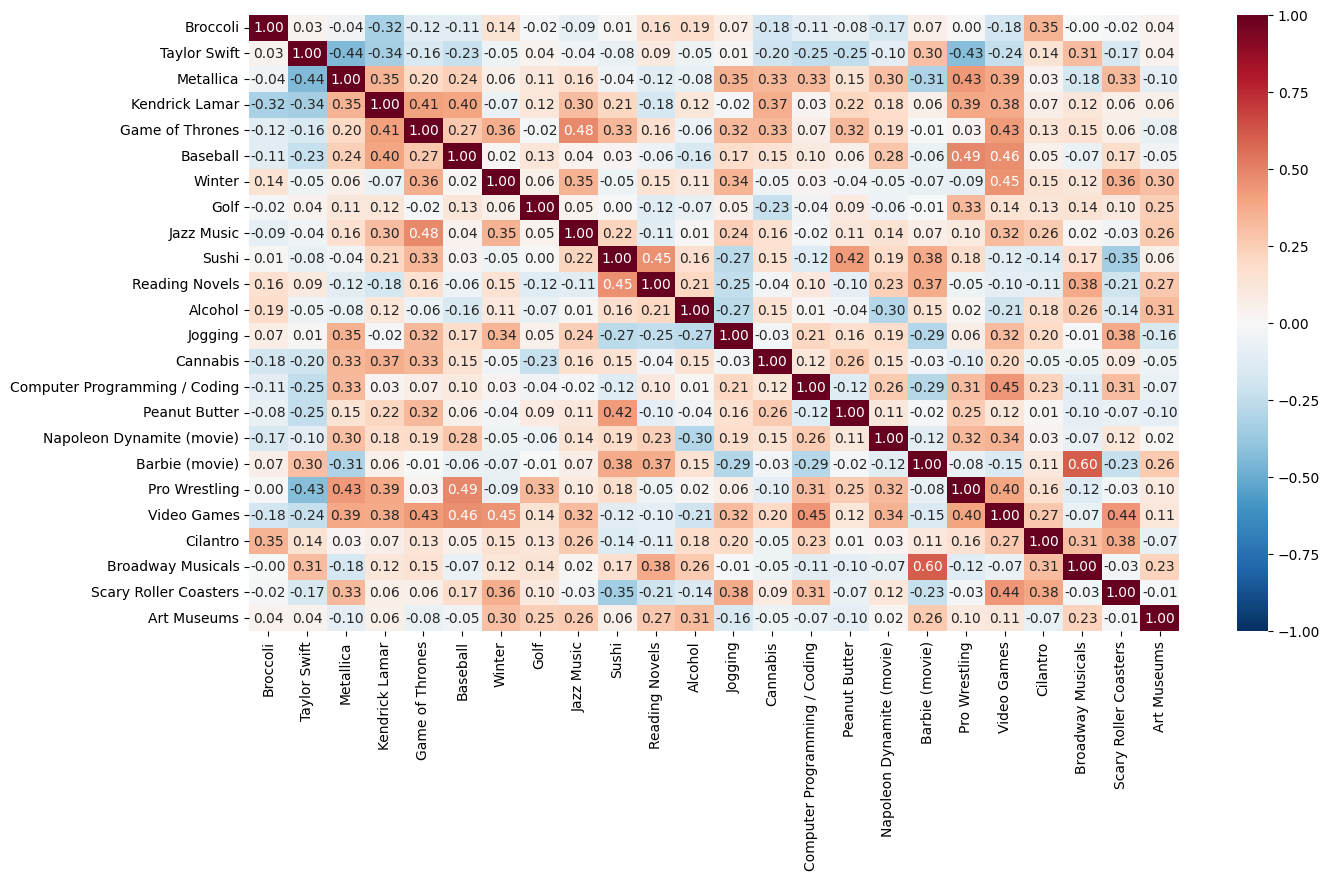

In [ ]:
# heatmap of correlations

import seaborn as sns


# Calculate the correlation matrix
corr = class_df[feature_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True,fmt=".2f", cmap='RdBu_r', cbar=True,vmin=-1,vmax=1)

plt.show()

Now plot a histogram of coffee cups per week.

How many people dont drink any coffee? 😲

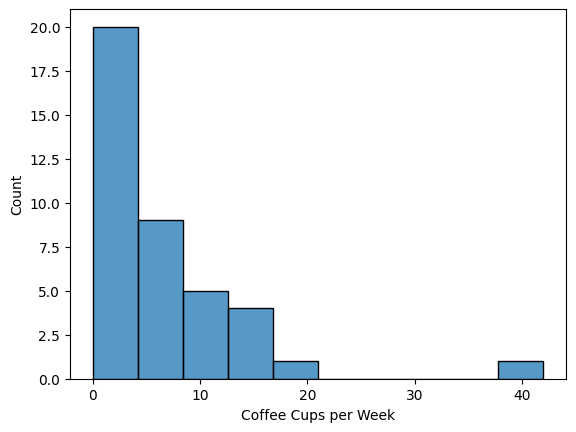

number of no coffee drinkers = 6


In [ ]:


ax = sns.histplot(class_df['Coffee'], bins=10)
ax.set(xlabel='Coffee Cups per Week', ylabel='Count')
plt.show()

no_coffee=class_df[class_df['Coffee'] == 0].shape[0]
print("number of no coffee drinkers =",no_coffee)


## Part 2: Looking at distances between students

One helpful suggestions would be to set *NYUID* as the index so that you can easily extract the data for any given  NYUID.

In [ ]:

# Set 'NYUID' as the index - this allows you to call the row by the NYUID
class_df.set_index('NYUID', inplace=True)
sims.set_index('NYUID', inplace=True) # only do this if havent done before


Use `sklearn.pairwise_distances`  to calculate a distance matrix "dist_matrix" (It may be helpful to convert the dist_matrix into a data frame using pd.DataFrame)

Use Manhattan distance because it will be more iterpretable.

Identify your data with your NYUID and see if you can find the three most similar students to you and the three least similar students to you

In [ ]:
from sklearn.metrics import pairwise_distances

# Calculate the pairwise distances
dist_matrix = pairwise_distances(class_df[feature_cols].values, metric='manhattan')

# Convert the distance matrix into a DataFrame
dist_df = pd.DataFrame(dist_matrix, index=class_df.index, columns=class_df.index)

# Input NYUID you would like to query - your id here!
input_NYUID = 'as17339'  # Replace 'input_value' with the actual NYUID


Find the three most similar students to you and the three least similar students to you.

Remember that the most similar student will be the student themself!  (distance = 0) so you will have to account for that.

also you might want to check to make sure that the input_NYUID is actuall in the index or else you will get an error.

In [ ]:
if (input_NYUID in class_df.index):

    # Get the distances for the input NYUID
    distances = dist_df.loc[input_NYUID]

    # Get the 3 most similar students (excluding the input student itself)
    most_similar = distances.nsmallest(4).iloc[1:] #starting at index 1 removes the student themself as the most similar

    # Get the 3 least similar students
    least_similar = distances.nlargest(3)

    # Print the NYUID and Name of the most and least similar students
    print("Most similar students to :", input_NYUID, class_df.loc[input_NYUID, 'Name'])
    for NYUID in most_similar.index:
        print(NYUID, class_df.loc[NYUID, 'Name'],most_similar[NYUID])

    print("\nLeast similar students to :", input_NYUID, class_df.loc[input_NYUID, 'Name'])
    for NYUID in least_similar.index:
        print(NYUID, class_df.loc[NYUID, 'Name'],least_similar[NYUID])

else:
    print('NYUID not found in the dataset')


Most similar students to : as17339 Aditya Suresh
rcm8445 Rohith 22.0
mk8793 Moin Khan 23.0
N11933331 Matias Gutierrez 27.0

Least similar students to : as17339 Aditya Suresh
N17944386 Kareena Parwani 51.0
pc3131 Pallabi  48.0
qw2366 Ruby Wu 47.0


Which two people are the closest? Because we use Manhattan distance, this distance is interpreted as the total sum of the absolute differences of the 24 features.


You can look for the smallest value in the matrix, but you need to account for the fact that the diagonals are zero...

this one is tricky, you need to us2 "unravel_index" to find the row and col in the matrix with the lowest value...(see solution)

In [ ]:
# Replace the diagonal of the distance matrix with np.inf
np.fill_diagonal(dist_df.values, np.inf)

# Find the NYUIDs of the two students who are the closest
min_dist = np.unravel_index(np.argmin(dist_df.values), dist_df.shape)
mdl=list(min_dist)
cls=dist_df.index[mdl]

print( class_df.loc[cls[0], 'Name'], ":", class_df.loc[cls[1], 'Name'], dist_df.loc[cls[0], cls[1]])


Ed : Ankit Mourya 13.0


Which two people in class are the furthest?

In [ ]:
# Replace the diagonal of the distance matrix with 0
np.fill_diagonal(dist_df.values, 0)

# Find the NYUIDs of the two students who are the closest
max_dist = np.unravel_index(np.argmax(dist_df.values), dist_df.shape)
mdl=list(max_dist)
cls=dist_df.index[mdl]

print( class_df.loc[cls[0], 'Name'], ":", class_df.loc[cls[1], 'Name'], dist_df.loc[cls[0], cls[1]])

Kareena Parwani : Erwin 52.0


##Part 3: K nearest neighbors##

Since we dont have a lot of data in each class, use the entire sims data and split into 80/20 and fit a knn with k=5 (aka `KNeighborsRegressor(n_neighbors=5)`


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split


# Select the features and target
target = 'Coffee'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sims[feature_cols], sims[target], test_size=0.2, random_state=11)

# Create a KNeighborsRegressor with k=5
knn = KNeighborsRegressor(n_neighbors=32)

# Fit the model to the training data
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=32)

Make a scatterplot of predicted values for the test set on the x-axis and actual values on the y-axis.

Does the prediction seem any good?

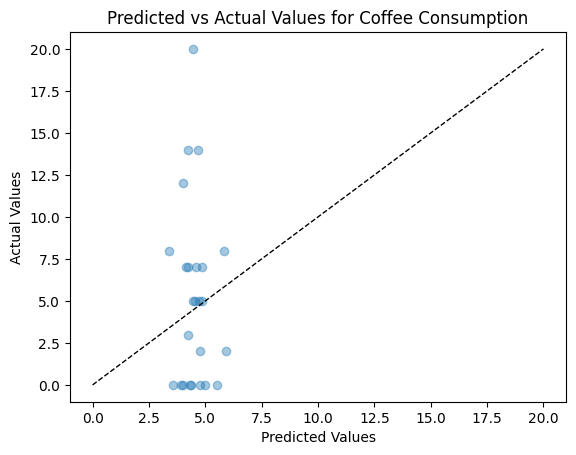

In [ ]:

import matplotlib.pyplot as plt

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Create a scatter plot of the actual values versus the predicted values
plt.scatter(y_pred,y_test,alpha=0.4)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual Values for Coffee Consumption')

# Add a reference line
plt.plot([0 , y_test.max()], [0, y_test.max()], 'k--', lw=1)

plt.show()

Using a for-loop - find the best k via RMSE.

In [ ]:
from sklearn.metrics import mean_squared_error
#yikes this is not good!  But lets calcuate the best k anyway

rmse_best = np.inf
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    if (rmse < rmse_best):
      rmse_best = rmse
      best_k = k
    print('k=', k, 'RMSE:', rmse.round(3))
print("\nBest value of k: ", best_k," with RMSE= ",rmse_best)

k= 1 RMSE: 43.72
k= 2 RMSE: 36.18
k= 3 RMSE: 32.147
k= 4 RMSE: 32.057
k= 5 RMSE: 28.392
k= 6 RMSE: 28.863
k= 7 RMSE: 27.336
k= 8 RMSE: 25.998
k= 9 RMSE: 25.138
k= 10 RMSE: 25.256
k= 11 RMSE: 26.592
k= 12 RMSE: 26.778
k= 13 RMSE: 26.91
k= 14 RMSE: 27.475
k= 15 RMSE: 27.99
k= 16 RMSE: 28.447
k= 17 RMSE: 28.311
k= 18 RMSE: 28.781
k= 19 RMSE: 28.624
k= 20 RMSE: 29.11

Best value of k:  9  with RMSE=  25.137777777777774


In [ ]:
## or you could use cross-validation!!

from sklearn.model_selection import cross_val_score

# Define the range of k values to test
k_values = range(1, 41)

# Initialize lists to store the mean scores for each k value
mean_scores = []

# Iterate over each k value
for k in k_values:
    # Create a KNeighborsRegressor with the current k value
    knn = KNeighborsRegressor(n_neighbors=k)

    # Perform cross-validation and calculate the mean score
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = -scores.mean()
    print('k=', k, 'Mean RMSE:', mean_score.round(3))
    # Append the mean score to the list
    mean_scores.append(mean_score)

# Find the best k value with the lowest mean score
best_k = k_values[np.argmin(mean_scores)]

print("Best k value:", best_k)


k= 1 Mean RMSE: 66.322
k= 2 Mean RMSE: 57.125
k= 3 Mean RMSE: 50.216
k= 4 Mean RMSE: 48.323
k= 5 Mean RMSE: 47.533
k= 6 Mean RMSE: 48.733
k= 7 Mean RMSE: 47.625
k= 8 Mean RMSE: 46.753
k= 9 Mean RMSE: 45.723
k= 10 Mean RMSE: 44.312
k= 11 Mean RMSE: 43.607
k= 12 Mean RMSE: 42.834
k= 13 Mean RMSE: 42.717
k= 14 Mean RMSE: 42.425
k= 15 Mean RMSE: 41.698
k= 16 Mean RMSE: 41.104
k= 17 Mean RMSE: 41.305
k= 18 Mean RMSE: 41.264
k= 19 Mean RMSE: 41.517
k= 20 Mean RMSE: 41.201
k= 21 Mean RMSE: 40.792
k= 22 Mean RMSE: 40.705
k= 23 Mean RMSE: 40.406
k= 24 Mean RMSE: 40.446
k= 25 Mean RMSE: 40.383
k= 26 Mean RMSE: 40.188
k= 27 Mean RMSE: 40.006
k= 28 Mean RMSE: 39.997
k= 29 Mean RMSE: 40.035
k= 30 Mean RMSE: 40.141
k= 31 Mean RMSE: 40.063
k= 32 Mean RMSE: 39.759
k= 33 Mean RMSE: 39.972
k= 34 Mean RMSE: 40.008
k= 35 Mean RMSE: 39.86
k= 36 Mean RMSE: 40.173
k= 37 Mean RMSE: 39.984
k= 38 Mean RMSE: 40.113
k= 39 Mean RMSE: 40.102
k= 40 Mean RMSE: 39.887
Best k value: 32


## Part 4: Clustering

Lets perform hierarchical clustering to find the "10-cluster solution" and print out the clusters.

Did any of you end up in clusters with your project team members?

All code provided...



In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Note: this is a different way than used in the HierClust.ipynb notebook.  both are fine!
# Create an AgglomerativeClustering model with 6 clusters
cluster = AgglomerativeClustering(n_clusters=10, linkage='ward')

# Fit the model to the data and predict the cluster labels
cluster_labels = cluster.fit_predict(class_df[feature_cols])
student_clusters = class_df.assign(Cluster=cluster_labels)



In [ ]:

for cluster, data in student_clusters.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(data.Name.tolist())
    print()

Cluster 0:
['Aniket Verma', 'Leon Zhang', 'Ed', 'Ishan Miglani', 'Siddharth Singh', 'Karthik', 'Atman Wagle', 'Luwei Wang', 'Ankit Mourya']

Cluster 1:
['Shiwei He', 'Manisha', 'Erwin', 'Jiabao Zhuang']

Cluster 2:
['Fei', 'Kareena Parwani', 'Saachee', 'Ruby Wu', 'Pallabi ']

Cluster 3:
['Rohith', 'Aditya Suresh']

Cluster 4:
['Rhea Chandok', 'Sunny Shah', 'Chung-Lin Wu', 'Ruijie Sun']

Cluster 5:
['Krina Sheth', 'Mingzhi Li', 'Sanam Palsule', 'Keya Keya', 'Shraddha', 'Chenyi Fu']

Cluster 6:
['Asher', 'Joe Kaewbaidhoon', 'The best-looking boy in this room']

Cluster 7:
['Moin Khan', 'Thomas Vetere']

Cluster 8:
['Priyanshi Singh']

Cluster 9:
['Arya Goyal', 'Krish', 'Ashlin Kneeland', 'Matias Gutierrez']



Plot the dendrogram.

Play around with the following  parameters:
in the linkage function : `method` and `metric`

in the dendrogram: `orientation` - for the direction of the plot
                : `color_threshold` - for how the plot is colored showing different clusters

can use `labels=class_df.index` to show NYUID instead of names...


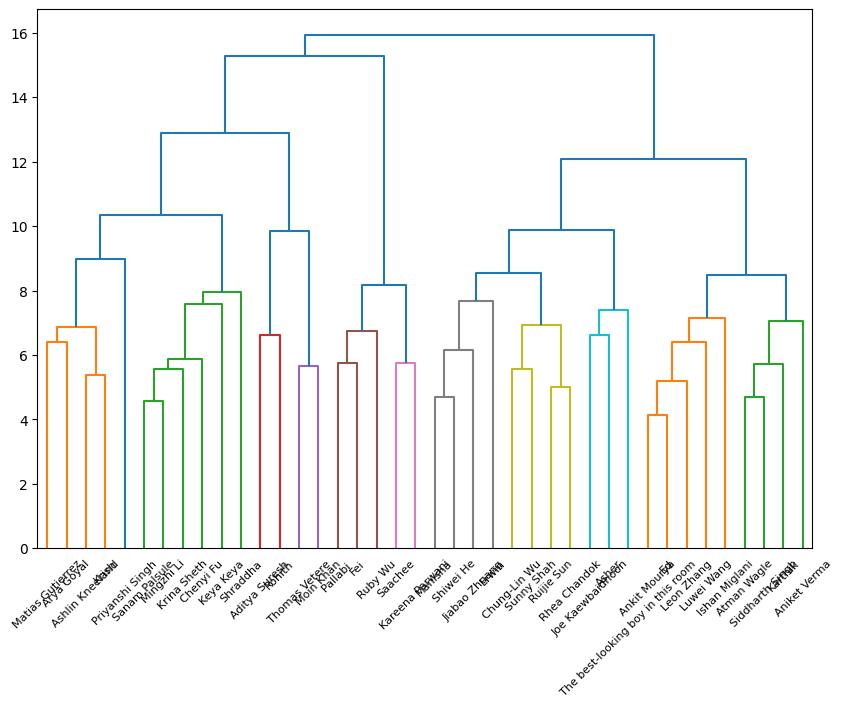

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Create a linkage matrix
linked = linkage(class_df[feature_cols], 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', color_threshold=8, labels=class_df.Name, distance_sort='descending', show_leaf_counts=True)
plt.show()

For fun - we can also cluster the *features* to see which are most similar...by passing the feature correlation matrix into the `linked` function




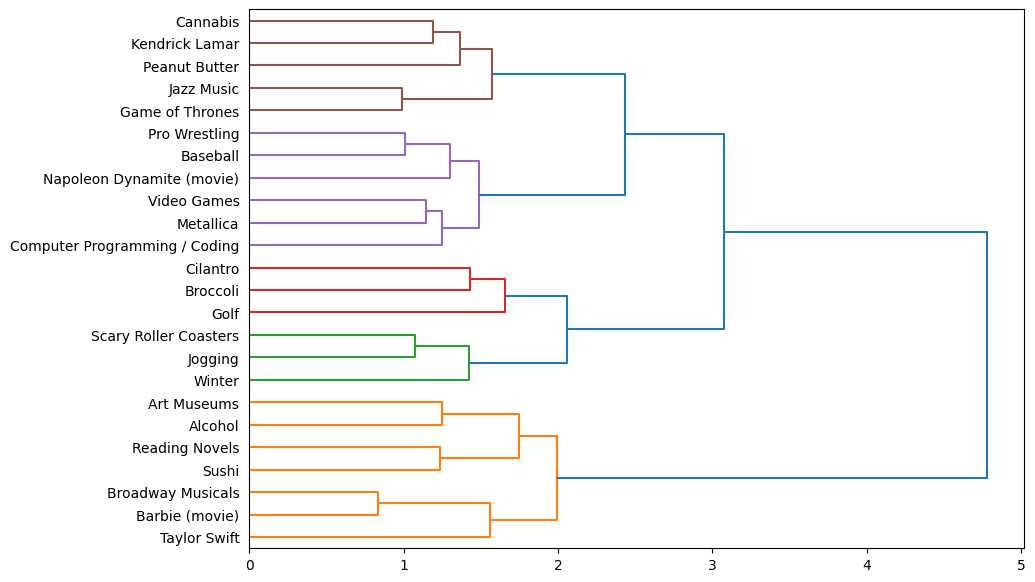

In [ ]:
# Calculate the correlation matrix
corr = class_df[feature_cols].corr()

# Create a linkage matrix based on the correlation matrix
linked = linkage(corr, 'ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=corr.columns, orientation='right',color_threshold = 2)
plt.show()